John Boyd
<br/>
2/27/21
<br/>
AD 450
<br/>
**Python version:** 3

**Introduction**
<br/>
*This project takes an initial look into the US Accident data from the past 5 years. Areas of investigation include:*
- Accident rates per state
- Trends for times of accidents
- Factors indicating severity of accidents
<br/>

In [1]:
# Relevant imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load data into memory
data = pd.read_csv('~/AD450_Scripts/US_Accidents/US_Accidents_Dec20.csv')

<br />

**UNDERSTANDING INITIAL DATASET**

In [3]:
# Get a sense of the data
print(len(data))
data.head()

4232541


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


*Table showing basics of the data. Roughly ~4 million rows.*

In [5]:
# List all columns since some were obscured
list_of_column_names = list(data.columns)
print('All column names: ', list_of_column_names)

All column names:  ['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


*Get a list of all the 49 columns in the dataset.*

In [6]:
# First check is any entries are null
data.isnull().sum()

ID                             0
Source                         0
TMC                      1516064
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2716477
End_Lng                  2716477
Distance(mi)                   0
Description                    2
Number                   2687949
Street                         0
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1292
Country                        0
Timezone                    4615
Airport_Code                8973
Weather_Timestamp          62644
Temperature(F)             89900
Wind_Chill(F)            1896001
Humidity(%)                95467
Pressure(in)               76384
Visibility(mi)             98668
Wind_Direction             83611
Wind_Speed(mph)           479326
Precipitat

*Checking columns that contain no entries. Particularly Time, Location and Severity columns.*

<br />

**INITAL DATA ANALYSIS & GRAPHING**

In [6]:
def graphResults(xAxis, graphTitle, dim1, dim2, sortValue, isAsc):
    if sortValue in data.columns:
        accidents_per_value = data.groupby(xAxis)[['ID']].count()
        accidents_per_value = accidents_per_value.sort_values(by = sortValue, ascending = isAsc)
        return accidents_per_value.plot.bar(title = graphTitle, figsize = (dim1,dim2))
    else:
        return 'Column not in dataframe.'

In [18]:
def severityResults(xAxis, title):
    groupBy = data.groupby([xAxis, 'Severity'])[xAxis].count().unstack('Severity').fillna(0)
    groupBy.loc[:, [1, 2, 3, 4]].plot.bar(    
        title = title,
        stacked = True,
        figsize = (15,4)
    )

**a. Accidents Vs. State**

In [5]:
# Group data by state, and set index to State
accidents_per_state = data.groupby('State')[['ID']].count()

In [162]:
# Sort data into descending list by state
accidents_per_state.head()

,ID
State,
AL,57017
AR,5105
AZ,93103
CA,972585
CO,54035


*List of most accidents per first five states.*

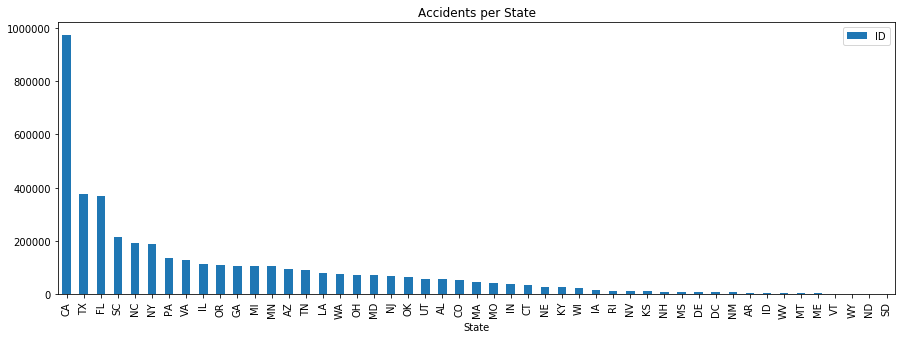

In [26]:
# Remove later due to duplication below
graphResults('State', 'Accidents per State', 15, 5, 'ID', False)

*Accidents per State.*

In [148]:
# Reset index and sort
accidents_per_state = data.groupby('State')[['ID']].count().reset_index()
accidents_per_state = accidents_per_state.sort_values(by = "ID", ascending = False)

[Text(0.5, 0, 'Accidents'), Text(0.5, 1.0, 'Accidents Vs. State')]

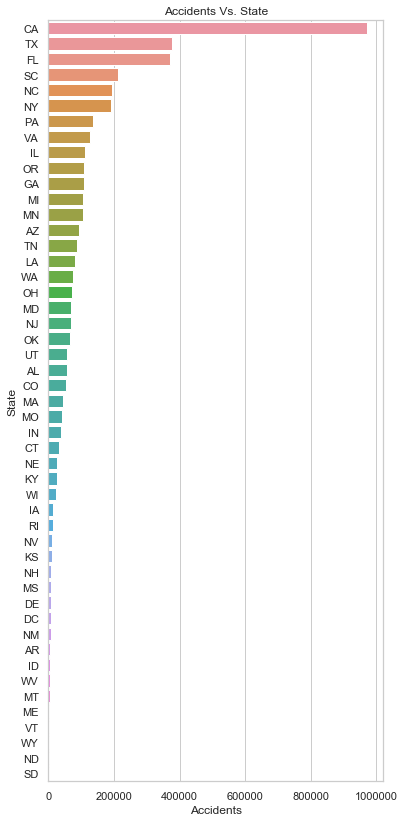

In [149]:
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
# https://stackoverflow.com/questions/14770735/how-do-i-change-the-figure-size-with-subplots

sns.set(style = "whitegrid") # Create plot with vertical grid lines

fig, axesSubplot = plt.subplots(figsize = (6, 14)) # Create subplot figure size dimensions

axesBarPlot = sns.barplot( x = "ID", y = "State", data = accidents_per_state) # Plot state vs. accident data
axesBarPlot.set(xlabel = 'Accidents', title = "Accidents Vs. State") # Set custom x-axis label

*We can clearly see that California, Texas, Florida have extremely large accident counts. Could this figure be due to their large population, rate of reporting, or perhaps other reasons besides these?*

<br/>

**b. Accidents Per State Per Population**

In [20]:
accidents_per_pop = data.groupby('State')[['ID']].count()

In [21]:
# Note: No Alaska or Hawaii. But there is DC
# https://www.infoplease.com/us/states/state-population-by-rank -source
# Uses 2020 population data.
test = pd.DataFrame({'AL': [4921532], 'AR': [3030522], 'AZ': [7421401], 'CA': [39368078], 'CO': [5807719], 'CT': [3557006], 'DC': [712816], 'DE': [986809], 'FL': [21733312], 'GA': [10710017], 'IA': [3163561], 'ID': [1826913], 'IL': [12587530], 'IN': [6754953], 'KS': [2913805], 'KY': [4477251], 'LA': [4645318], 'MA': [6893574], 'MD': [6055802], 'ME': [1350141], 'MI': [9966555], 'MN': [5657342], 'MO': [6151548], 'MS': [2966786], 'MT': [1080577], 'NC': [10600823], 'ND': [765309], 'NE': [1937552], 'NH': [1366275], 'NJ': [8882371], 'NM': [2106319], 'NV': [3138259], 'NY': [19336776], 'OH': [11693217], 'OK': [3980783], 'OR': [4241507], 'PA': [12783254], 'RI': [1057125], 'SC': [5218040], 'SD': [892717], 'TN': [6886834], 'TX': [29360759], 'UT': [3249879], 'VA': [8590563], 'VT': [623347], 'WA': [7693612], 'WI': [5832655], 'WV': [1784787], 'WY': [582328]})

# As list
# test = [4921532, 3030522,7421401,39368078,5807719,3557006,712816,986809,21733312,10710017,3163561,1826913,12587530,6754953,2913805,4477251,4645318,6893574,6055802,1350141,9966555,5657342,6151548,2966786,1080577,10600823,765309,1937552,1366275,8882371,2106319,3138259,19336776,11693217,3980783,4241507,12783254,1057125,5218040,892717,6886834,29360759,3249879,8590563,623347,7693612,5832655,1784787,582328]

# Transpose data
tester = test.T

# Append population data
accidents_per_pop['Pop'] = tester

accidents_per_pop['Acc Per Pop'] = accidents_per_pop['ID'] / accidents_per_pop['Pop'] * 1000
accidents_per_pop.head()

,ID,Pop,Acc Per Pop
State,,,
AL,57017,4921532,11.585214
AR,5105,3030522,1.684528
AZ,93103,7421401,12.545205
CA,972585,39368078,24.704914
CO,54035,5807719,9.303997


*See initial data of states with population, and accidents per 1000 population.*

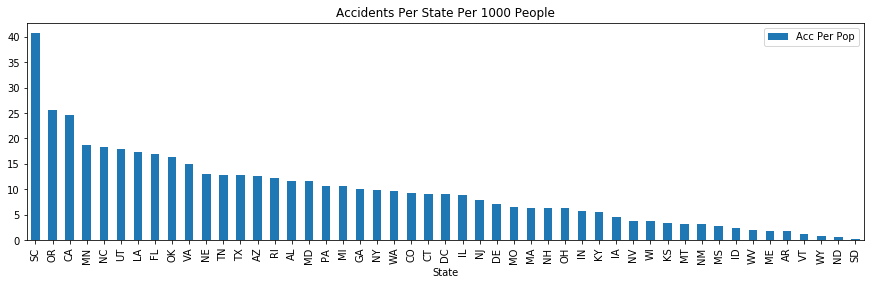

In [29]:
accidents_per_pop = accidents_per_pop.sort_values(by = "Acc Per Pop", ascending = False)
accidents_per_pop[['Acc Per Pop']].plot.bar(title = 'Accidents Per State Per 1000 People', figsize = (15,4))

*Accidents Per 1000 people using 2020 population numbers. Interestingly South Carolina is clearly higher than the rest at 40 accidents per 1000 people. Compared to insurance rates...*

In [ ]:
# Trying to make a nice plot with sns, but not working currently

# dataGroup = dataGroup.sort_values(by = "Acc Per Pop", ascending = False)
# sns.set(style = "whitegrid") # Create plot with vertical grid lines

# fig, axesSubplot = plt.subplots(figsize = (14, 6)) # Create subplot figure size dimensions

# axesBarPlot = sns.barplot(  data = dataGroup) # Plot state vs. accident data
# # axesBarPlot.set(xlabel = 'Accidents', title = "Accidents Vs. State") # Set custom x-axis label

<br/>

**TIME OCCURRENCE OF ACCIDENTS**

**a. Alter Data Types**

In [12]:
# Check current data types
data.dtypes.head()

ID             object
Source         object
TMC           float64
Severity        int64
Start_Time     object
dtype: object

*Start_Time is an object currently. We need to convert to DateTime for easier manipulation.*

In [3]:
# Convert to datetime
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])
data['Start_Time'].head()

0   2016-02-08 05:46:00
1   2016-02-08 06:07:59
2   2016-02-08 06:49:27
3   2016-02-08 07:23:34
4   2016-02-08 07:39:07
Name: Start_Time, dtype: datetime64[ns]

In [4]:
data['Year'] = data['Start_Time'].dt.year # Add Year to dataset (1-12)
data['Month'] = data['Start_Time'].dt.month # Add Month to dataset (1-12)
data['Weekday'] = data['Start_Time'].dt.weekday # Weekday (1-7)
data['Day'] = data['Start_Time'].dt.day # Day (1-31)
data['Hour'] = data['Start_Time'].dt.hour # Hour 
data['DayOfWeek'] = data['Start_Time'].dt.dayofweek # Day of Week
data['Date'] = data['Start_Time'].dt.date # Date YYYY-MM-DD

*Get date, year, month, day, hour from accident data start times.*

**b. Accidents Per Day**

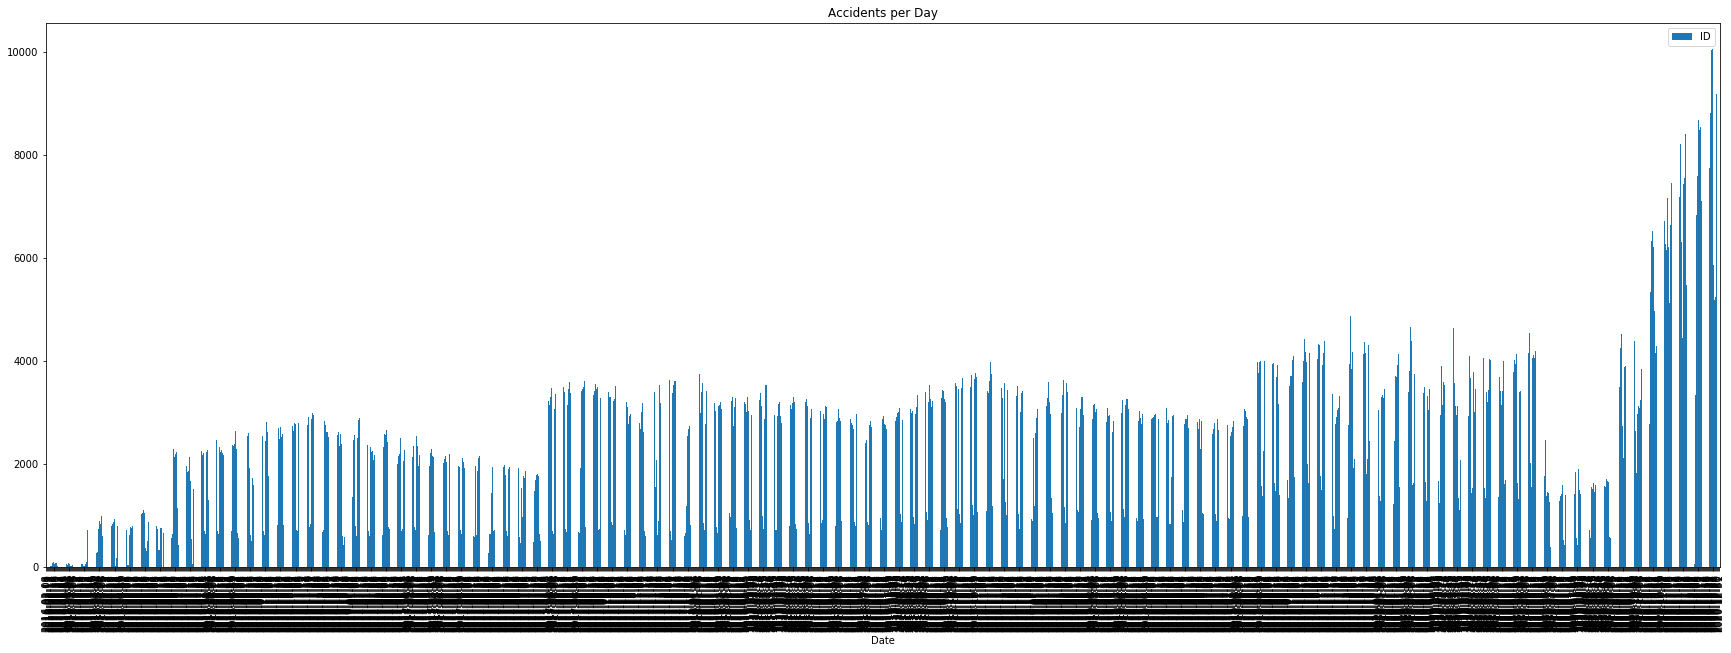

In [7]:
graphResults('Date', 'Accidents per Day', 30, 10, 'Date', True)

*Plot showing accidents per day from Feb 2016-Dec 2020. It is difficult to read the dates at the bottom, but I believe the dip toward the right is from the covid pandemic.*

<br/>

**b. Accidents Per Year**

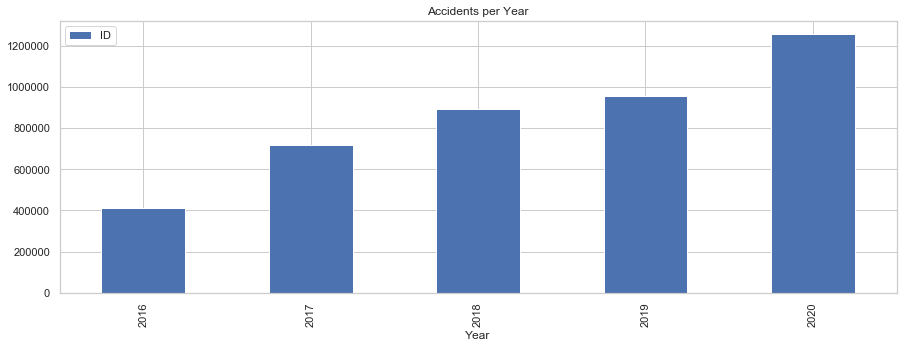

In [39]:
graphResults('Year', 'Accidents per Year', 15, 5, 'Year', True)

<br/>

**b. Accidents Per Month**

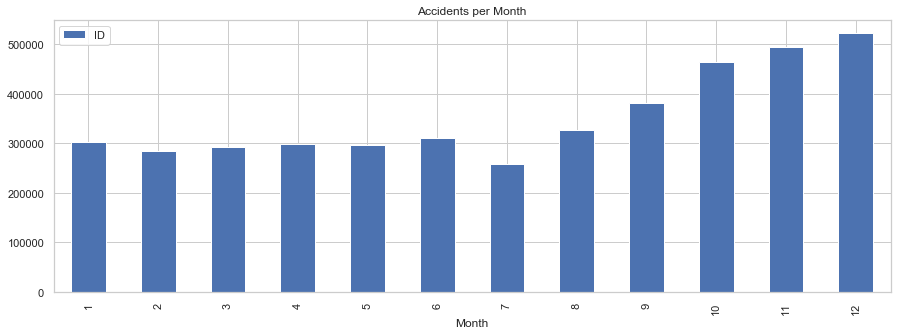

In [38]:
graphResults('Month', 'Accidents per Month', 15, 5, 'Month', True)

In [26]:
# Reset index and sort
accidents_per_month = data.groupby('Month')[['ID']].count().reset_index()
accidents_per_month = accidents_per_month.sort_values(by = "ID", ascending = False)

[Text(0, 0.5, 'Accidents'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Accidents Per Month')]

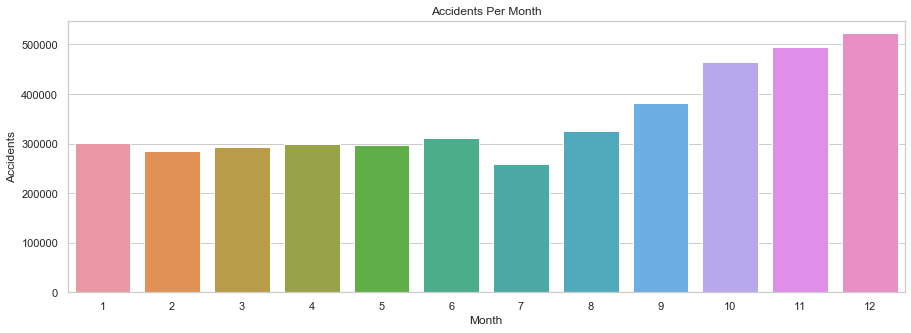

In [27]:
sns.set(style = "whitegrid") # Create plot with vertical grid lines

fig, axesSubplot = plt.subplots(figsize = (15, 5)) # Create subplot figure size dimensions

axesBarPlot = sns.barplot( x = "Month", y = "ID", data = accidents_per_month) # Plot state vs. accident data
axesBarPlot.set(xlabel = 'Month', ylabel = 'Accidents', title = "Accidents Per Month") # Set custom x-axis label

*Same as previous graph but with colors. Accidents increase toward the end of the year but drop off at the start of the year interestingly.*

<br/>

**c. Accidents Per Weekday**

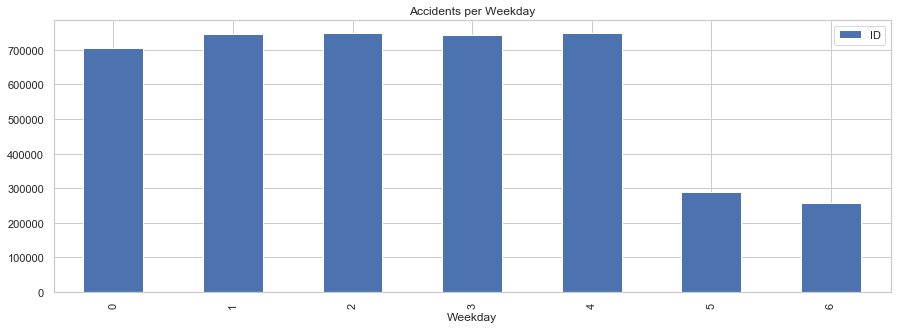

In [37]:
graphResults('Weekday', 'Accidents per Weekday', 15, 5, 'Weekday', True)

*Graph of accidents per weekday. The weekends are surprisingly low.*

<br/>

**d. Accidents Per Day of Month**

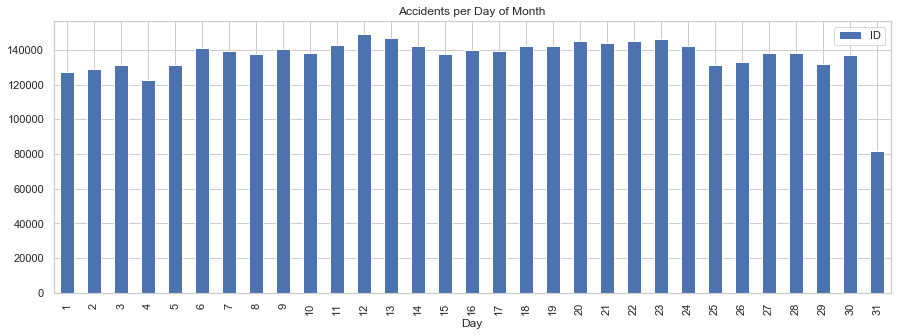

In [36]:
graphResults('Day', 'Accidents per Day of Month', 15, 5, 'Day', True)

*Accidents per day of the month*

<br/>

**e. Accidents Per Hour**

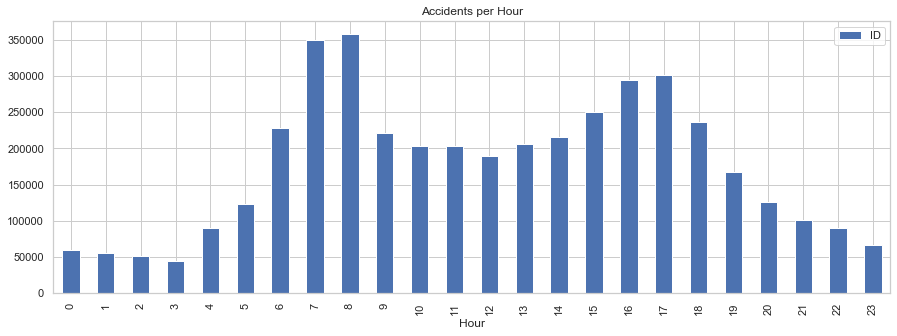

In [28]:
# Custom function to plot data
graphResults('Hour', 'Accidents per Hour', 15, 5, 'Hour', True)

*High rate of accidents during commute hours. Particularly in the morning*

<br/>

**INITIAL CORRELATION ANALYSIS ON SEVERITY**

**a. Another Look at Data**

In [60]:
# Check null entries again
data.isnull().sum()

ID                             0
Source                         0
TMC                      1516064
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2716477
End_Lng                  2716477
Distance(mi)                   0
Description                    2
Number                   2687949
Street                         0
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1292
Country                        0
Timezone                    4615
Airport_Code                8973
Weather_Timestamp          62644
Temperature(F)             89900
Wind_Chill(F)            1896001
Humidity(%)                95467
Pressure(in)               76384
Visibility(mi)             98668
Wind_Direction             83611
Wind_Speed(mph)           479326
Precipitat

*Another look at which columns have null values. Severity has none.*

<br/>

**b. Look for Basic Correlations with Severity and Time**

In [11]:
# Pearson Correlations
pd.set_option('display.width', 100)
pd.set_option('precision', 3)

timeFrame = ['Hour', 'Weekday', 'Month', 'Year']

for col in timeFrame:
    correlations = data[['Severity', col]].corr(method='pearson')
    print(correlations)

          Severity   Hour
Severity     1.000  0.025
Hour         0.025  1.000
          Severity  Weekday
Severity     1.000    0.057
Weekday      0.057    1.000
          Severity  Month
Severity     1.000 -0.068
Month       -0.068  1.000
          Severity   Year
Severity     1.000 -0.148
Year        -0.148  1.000


*Correlations between severity of the accident and certain timeframes. Not really any strong correlation.*

In [12]:
# Spearman correlations
pd.set_option('display.width', 100)
pd.set_option('precision', 3)

timeFrame = ['Hour', 'Weekday', 'Month', 'Year']

for col in timeFrame:
    correlations = data[['Severity', col]].corr(method='spearman')
    print(correlations)

          Severity   Hour
Severity     1.000  0.029
Hour         0.029  1.000
          Severity  Weekday
Severity     1.000    0.052
Weekday      0.052    1.000
          Severity  Month
Severity     1.000 -0.078
Month       -0.078  1.000
          Severity   Year
Severity     1.000 -0.166
Year        -0.166  1.000


*Spearman results are similar to Peason.*

<br/>

**MORE DATA GRAPHING**

In [23]:
# graphSeverityResults('Month', 'Accidents per Month', 15, 5, 'Month', True) # meaningless...
# See the range of severity accidents
severity = data.groupby('Severity')[['ID']].count()
severity

,ID
Severity,
1,29312
2,3006626
3,1072821
4,123782


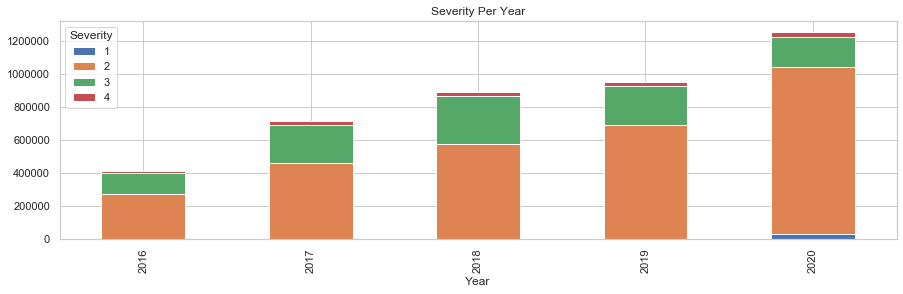

In [35]:
# Visualize severity per year
severityResults('Year', 'Severity Per Year')

*It looks like category 1 accidents may be a recent addition*

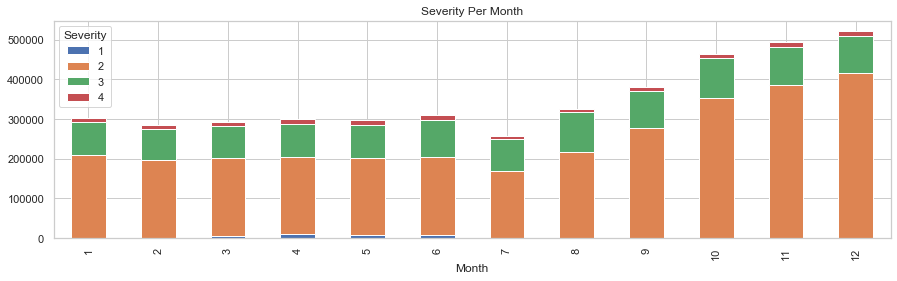

In [34]:
# Visualize severity per Month
severityResults('Month', 'Severity Per Month')

*Apr, May, June, Nov, Dec seem to have slightly more higher severity accidents. But this could be due to many reasons.*

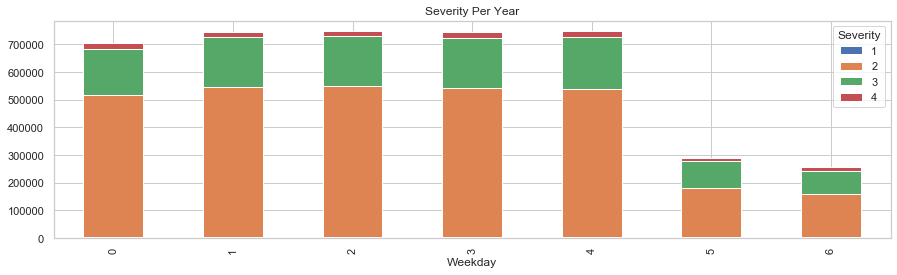

In [33]:
# Visualize severity per year
severityResults('Weekday', 'Severity Per Year')

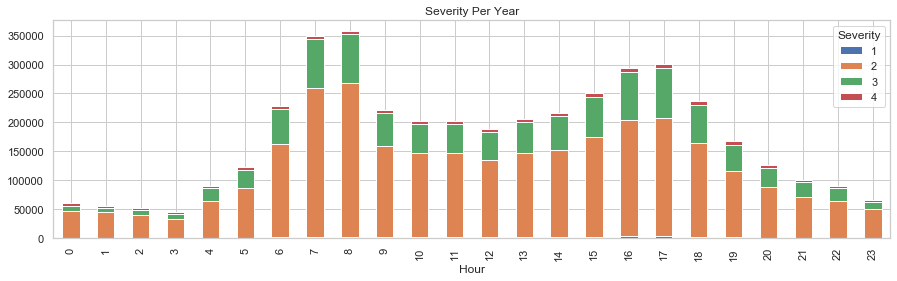

In [32]:
# Visualize severity per year
severityResults('Hour', 'Severity Per Year')

*Slightly higher severity accidents in the evening around 15-19*

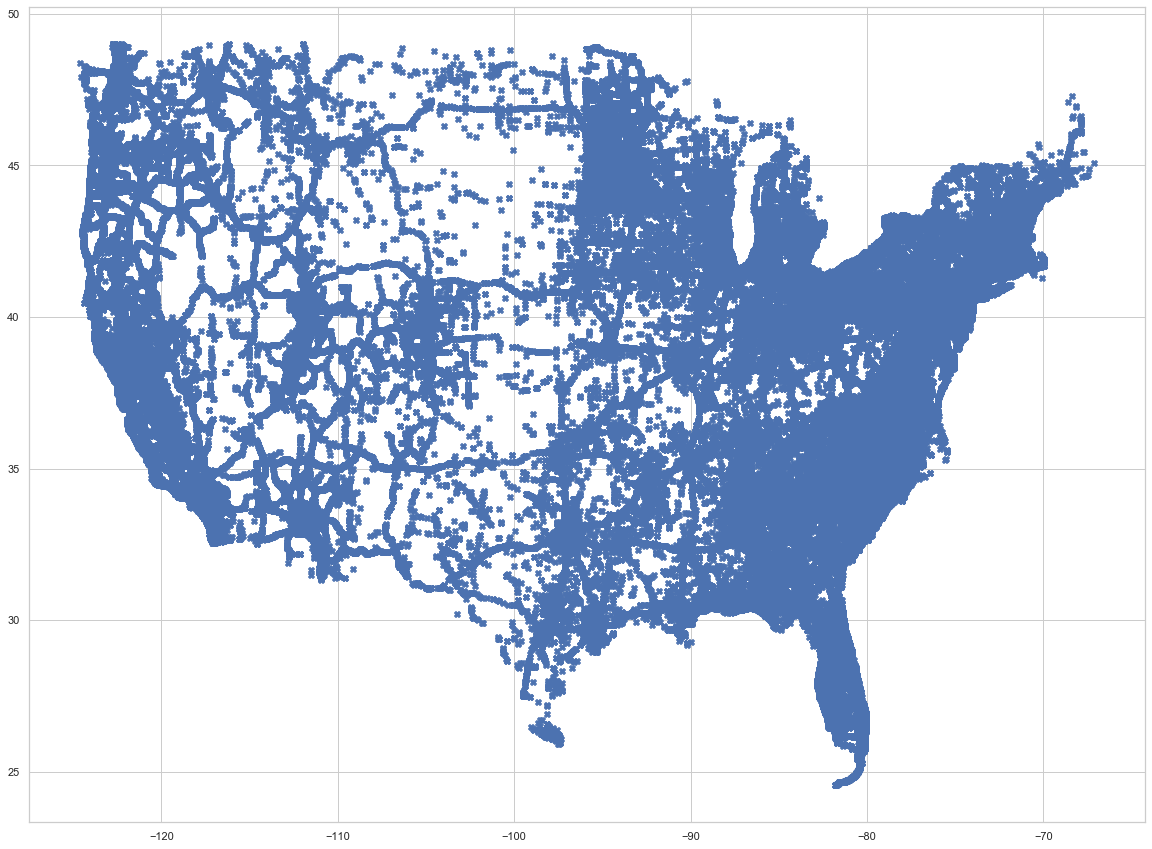

In [73]:
plt.figure(figsize = (20,15))
plot_count = 1

plt.subplot(1,1,1)
plt.scatter(data.loc[:, 'Start_Lng'], data.loc[:, 'Start_Lat'], marker="X")
plt.show()

*Plotting lat and long coordinates to visulaize where accidents occur. Compared to US Interstate Map...* 

<br/>

**Analysis of Impact & Conclusion:** *This project gives a good introductory look into the data and trends of car accidents in the US. The accidents per state per population were particularly interesting. If I had more time, I would try to investigate if any other data within this dataset could help explain exactly why South Carolina had such a large rate of accidents per population, hoping that this would provide more insight into traffic accidents in general. I would also be interested in comparing accident rates during known holidays like New Years Eve, Christmas, Thanksgiving... It would also be interesting to see how a Time Series analysis looked with this dataset, and if it would be possible to predict future accidents, or  severity of accidents in different locations and times.
<br/>
In conclusion this dataset provides a large wealth of great information, with much potential for further exploration. If we can better understand the who, what, when, why, how for traffic accidents in the US, then we can better understand ways to prevent future accidents as well, helping society stay safer on the roadways!*

<br/>

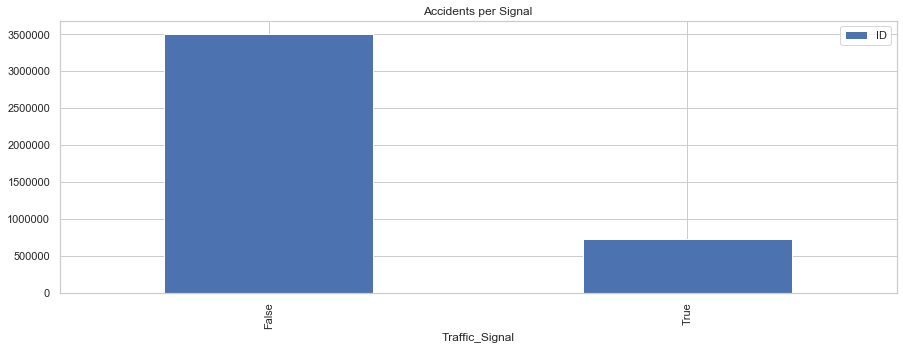

In [43]:
graphResults('Traffic_Signal', 'Accidents per Signal', 15, 5, 'Traffic_Signal', True)

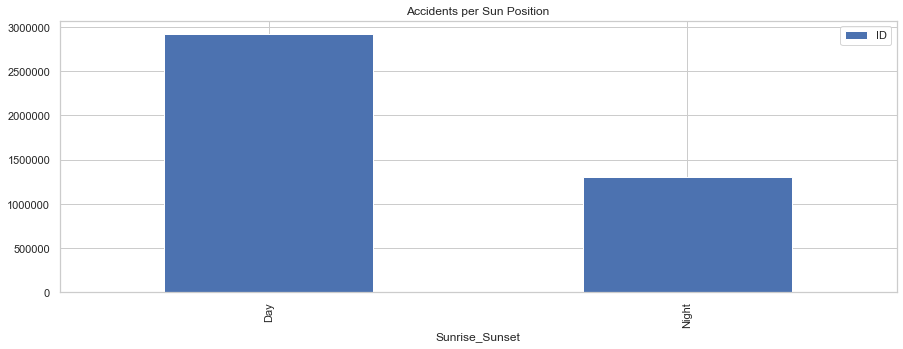

In [44]:
graphResults('Sunrise_Sunset', 'Accidents per Sun Position', 15, 5, 'Sunrise_Sunset', True)

In [159]:
# Notes cell
# # Group data by state
# dataGroup = data.groupby('State')[['ID']].count()
# accidents_per_state = dataGroup.reset_index()

# # dataGroup

# # Note: No Alaska or Hawaii. But there is DC
# test = pd.DataFrame({'AL': [4921532], 'AR': [3030522], 'AZ': [7421401], 'CA': [39368078], 'CO': [5807719], 'CT': [3557006], 'DC': [712816], 'DE': [986809], 'FL': [21733312], 'GA': [10710017], 'IA': [3163561], 'ID': [1826913], 'IL': [12587530], 'IN': [6754953], 'KS': [2913805], 'KY': [4477251], 'LA': [4645318], 'MA': [6893574], 'MD': [6055802], 'ME': [1350141], 'MI': [9966555], 'MN': [5657342], 'MO': [6151548], 'MS': [2966786], 'MT': [1080577], 'NC': [10600823], 'ND': [765309], 'NE': [1937552], 'NH': [1366275], 'NJ': [8882371], 'NM': [2106319], 'NV': [3138259], 'NY': [19336776], 'OH': [11693217], 'OK': [3980783], 'OR': [4241507], 'PA': [12783254], 'RI': [1057125], 'SC': [5218040], 'SD': [892717], 'TN': [6886834], 'TX': [29360759], 'UT': [3249879], 'VA': [8590563], 'VT': [623347], 'WA': [7693612], 'WI': [5832655], 'WV': [1784787], 'WY': [582328]})

# # List Form
# # test = [4921532, 3030522,7421401,39368078,5807719,3557006,712816,986809,21733312,10710017,3163561,1826913,12587530,6754953,2913805,4477251,4645318,6893574,6055802,1350141,9966555,5657342,6151548,2966786,1080577,10600823,765309,1937552,1366275,8882371,2106319,3138259,19336776,11693217,3980783,4241507,12783254,1057125,5218040,892717,6886834,29360759,3249879,8590563,623347,7693612,5832655,1784787,582328]

# # Transpose data
# tester = test.T

# # Append population data
# dataGroup['Pop'] = tester
# dataGroup

# dataGroup.iat[1,0] # prints 1st accident value for AL
# print(dataGroup.iat[0,0])
# print(tester.iat[0,0])
# dataGroup.iat[0,0] / tester.iat[0,0]

# count = 0;
# for x in test:
    
    
#     print(x, dataGroup.iat[count, 0] / test[x]) # outputs accidents per population
#     count = count + 1



In [ ]:
# test = pd.DataFrame({'AL': [4921532], 'AR': [3030522], 'AZ': [7421401], 'CA': [39368078], 'CO': [5807719], 'CT': [3557006], 'DC': [712816], 'DE': [986809], 'FL': [21733312], 'GA': [10710017], 'IA': [3163561], 'ID': [1826913], 'IL': [12587530], 'IN': [6754953], 'KS': [2913805], 'KY': [4477251], 'LA': [4645318], 'MA': [6893574], 'MD': [6055802], 'ME': [1350141], 'MI': [9966555], 'MN': [5657342], 'MO': [6151548], 'MS': [2966786], 'MT': [1080577], 'NC': [10600823], 'ND': [765309], 'NE': [1937552], 'NH': [1366275], 'NJ': [8882371], 'NM': [2106319], 'NV': [3138259], 'NY': [19336776], 'OH': [11693217], 'OK': [3980783], 'OR': [4241507], 'PA': [12783254], 'RI': [1057125], 'SC': [5218040], 'SD': [892717], 'TN': [6886834], 'TX': [29360759], 'UT': [3249879], 'VA': [8590563], 'VT': [623347], 'WA': [7693612], 'WI': [5832655], 'WV': [1784787], 'WY': [582328]})
